### Logistic regression - pytorch algorithm

In [6]:
import torch
import pandas as pd
import numpy as np
from show import show

data = pd.read_csv('test.csv', header=None)
data = np.array(data)
print(data)

X_np = np.array(data[:,[0,1]])
y_np = np.array(data[:,[2]])

[[0.28488 0.52142 1.     ]
 [0.27633 0.21264 1.     ]
 [0.39748 0.31902 1.     ]
 [0.5533  1.      0.     ]
 [0.44274 0.59205 0.     ]
 [0.85176 0.6612  0.     ]
 [0.60436 0.86605 0.     ]]


In [2]:
#features
x = torch.from_numpy(X_np)
#target/labels
y = torch.from_numpy(y_np)

w = torch.tensor([[-1, 1]], requires_grad=True, dtype=torch.float64)
b = torch.tensor([[  0]], requires_grad=True, dtype=torch.float64)

In [3]:
#torch.randn(2, 1, dtype=torch.double, requires_grad=True)

In [4]:
# Loss (Binary Cross Entropy) cost/error function, explicit definition
def bce_err(y_hat, y):
    return -y * torch.log(y_hat) - (1-y) * torch.log(1-y_hat)

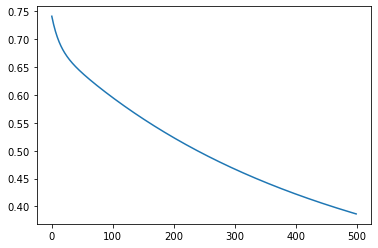

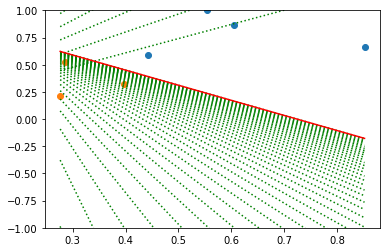

In [5]:
alpha = 0.1
epochs = 500

wHistory = []
lossHistory = []

def train():
    global w, b

    z = torch.mm(x,w.T) + b[0]
    y_hat = torch.nn.Sigmoid()(z)    
    loss_points = bce_err(y_hat,y)
    loss = torch.mean(loss_points)

    #backward: compute gradients
    loss.backward()   

    #update weights
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

        # Manually zero the gradients after updating weights
        w.grad.zero_()
        b.grad.zero_()   

    # for show function    
    # Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.    
    weights = w.detach().numpy()
    bias = b.detach().numpy()
    
    wHistory.append([weights[0][0],weights[0][1],bias[0][0]])     
    lossHistory.append(loss.detach().numpy())
            
for e in range(epochs):
    train()      

show(data, epochs, wHistory, lossHistory,[-1,1])     